In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

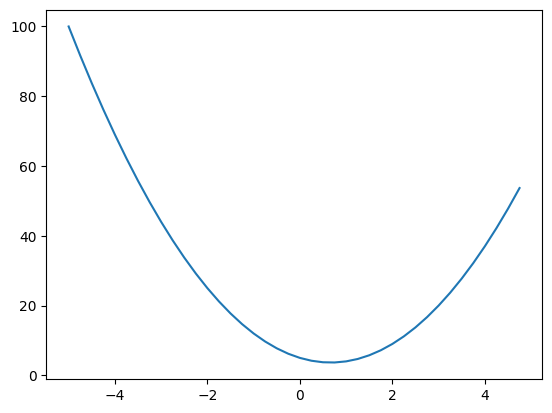

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [5]:
h=0.000001
x= 2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

In [6]:
a = 2.0
b = -3.0
c=10.0
d = a*b+c
print(d)

4.0


In [7]:
h=0.0001

a=2.0
b=-3.0
c=10.0

d1=a*b+c
c+=h
d2= a*b+c
print(d1,d2)
print('slope:',(d2-d1)/h)

4.0 4.0001
slope: 0.9999999999976694


In [39]:
class Value:
    def __init__(self,data,_children = (),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self.label=label
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self,),'tanh')
        def _backward():
            self.grad = (1 - (t)**2) * out.grad
        out._backward = _backward
        return out


a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f=Value(-2.0,label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

In [ ]:
from graphviz import Digraph
def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})
    nodes,edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid,label="{ %s | data %.4f | grad %.4f}" % (n.label,n.data,n.grad),shape='record')
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)
    return dot

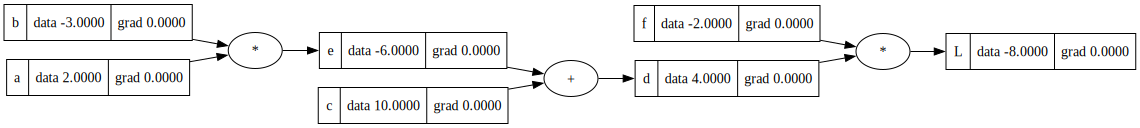

In [10]:
draw_dot(L)

In [11]:
def lol():
    h=0.001

    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f; L.label='L'
    L1 = L.data 

    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    b.data+=h
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0,label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print((L2-L1)/h)

lol()

-3.9999999999995595


NEURON

In [40]:
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
w1 = Value(-3.0,label='w1')
w2 = Value(1.0,label='w2')
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
b = Value(6.8813735870195432,label='b')
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

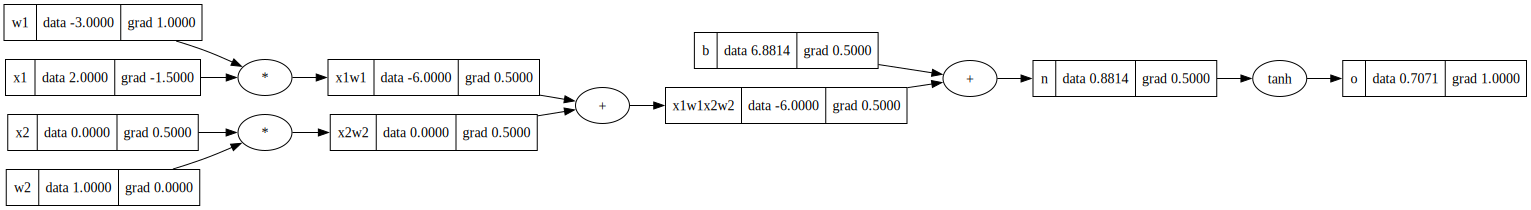

In [43]:
draw_dot(o)

In [42]:
o.grad = 1.0
o._backward()
n._backward()
x1w1x2w2._backward()
b._backward()
x1w1._backward()
x2w2._backward()
x1._backward()
x2._backward()
w1._backward()
w2._backward()

In [23]:
o.grad = 1.0

In [25]:
''' o = tanh(n)
    do/dn = 1 - tan(h)**2 = 1 - o**2
    '''
n.grad = 1 - o.data**2

In [27]:
''' n = x1w1x2w2 + b
    do/dx1w1x2w2 = do/dn * dn/dx1w1x2w2 = 0.5 * 1
    do/db = do/dn * dn/db = 0.5 * 1
'''
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [29]:
''' x1w1x2w2 = x1w1 + x2w2
    do/dx1w1 = do/dn * dn/dx1w1x2w2 * dx1w1x2w2/dx1w1 = 0.5 * 1 * 1
    do/dx2w2 = do/dn * dn/dx1w1x2w2 * dx1w1x2w2/dx2w2 = 0.5 * 1 * 1    
'''
x1w1.grad = 0.5*1*1
x2w2.grad = 0.5*1*1

In [31]:
''' x1w1 = x1*w1
    do/dx1 = do/dn * dn/dx1w1x2w2 * dx1w1x2w2/dx1w1 * dw1x1/dx1 = 0.5 * 1 * 1 * -3.0(w1)
    do/dw1 = do/dn * dn/dx1w1x2w2 * dx1w1x2w2/dx1w1 * dw1x1/dw1 = 0.5 * 1 * 1 * 2.0(x1)
    do/dx2 = do/dn * dn/dx1w1x2w2 * dx1w1x2w2/dx2w2 * dw2x2/dx2 = 0.5 * 1 * 1 * 1.0(w2)
    do/dw2 = do/dn * dn/dx1w1x2w2 * dx1w1x2w2/dx2w2 * dw2x2/dw2 = 0.5 * 1 * 1 * 0.0(x2)
'''
x1.grad = 0.5 * -3.0
w1.grad = 0.5 * 2.0
x2.grad = 0.5 * 1.0
w2.grad = 0.5 * 0.0